In [ ]:
from matplotlib import image
from matplotlib import pyplot as plt
import xml.etree.ElementTree as ET

In [45]:
sample_image_path = './examples/image-1-000001.jpg'
sample_dot_path = './examples/image-1-000001dots.png'
sample_coordinate_text_path = './examples/image-1-000001.txt'

In [106]:
x_list = []
y_list = []
with open(sample_coordinate_text_path) as file:
    for line in file:
        str_point = line.rstrip()
        point = str_point.split('\t')
        x_list.append(int(point[0]))
        y_list.append(int(point[1]))

In [108]:
print(x_list[0])
print(y_list[0])

75
358


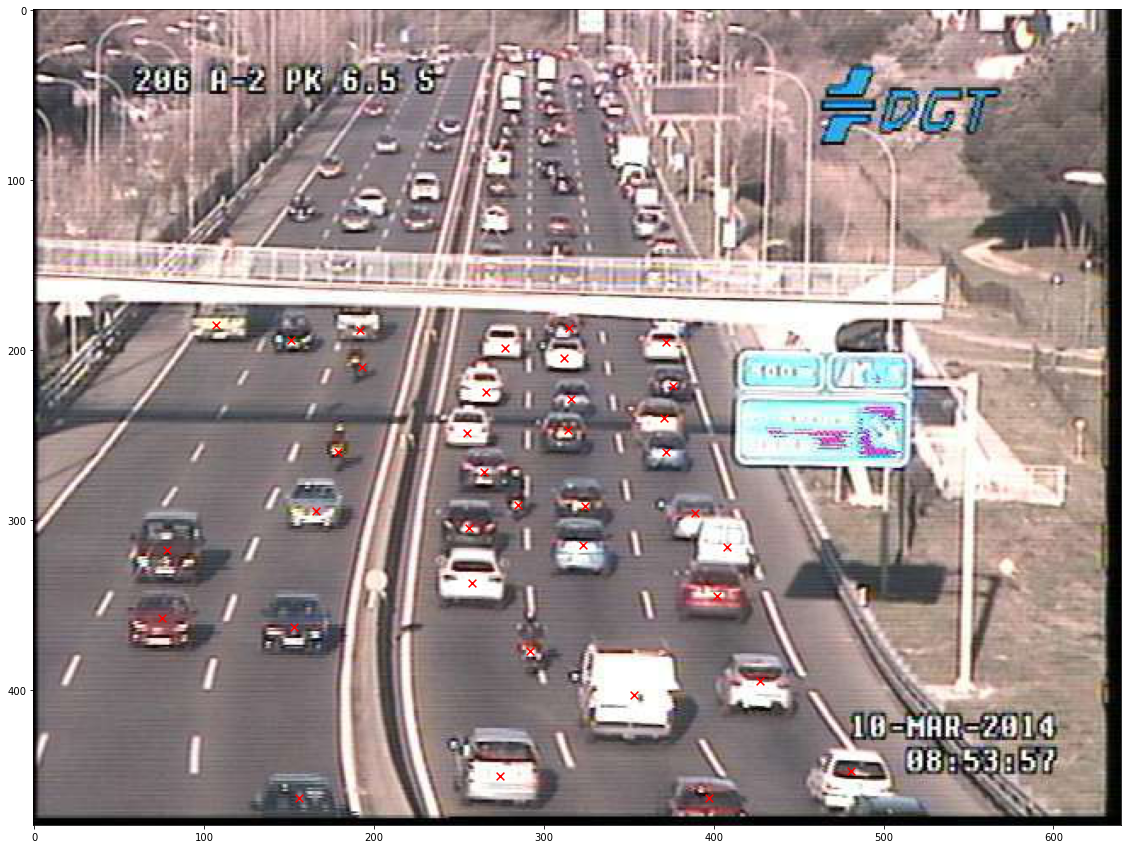

In [47]:
data = image.imread(sample_image_path)

plt.figure(figsize=(30, 15))
plt.scatter(x=x_list, y=y_list, marker='x', color="red", s=60)
plt.imshow(data)
plt.show()

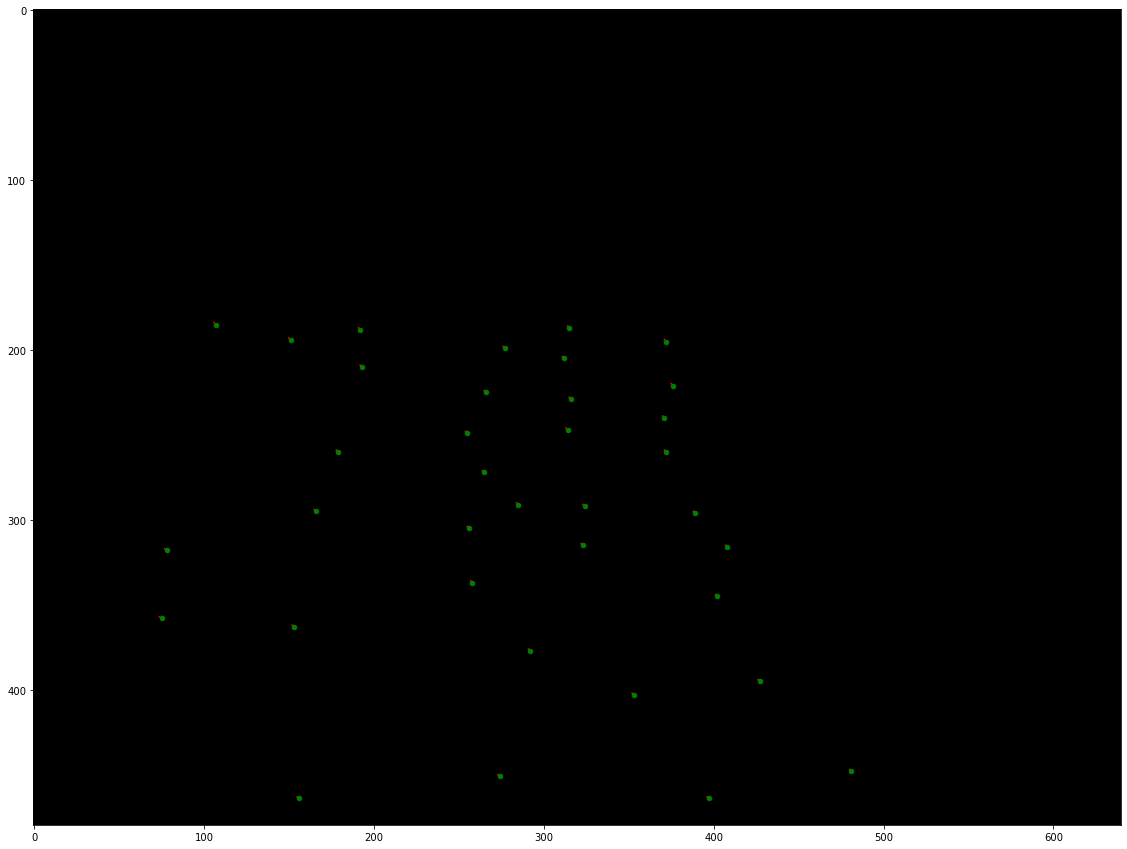

In [49]:
# to read the image stored in the working directory
data = image.imread(sample_dot_path)

plt.figure(figsize=(30, 15))
plt.scatter(x=x_list, y=y_list, marker='o', color="green", s=20)
plt.imshow(data)
plt.show()

In [53]:
sample_image_xml_path = './examples/image8004.jpg'
sample_bouding_boxes_xml_path = './examples/image8004.xml'

In [54]:
tree = ET.parse(sample_bouding_boxes_xml_path)
root = tree.getroot()

In [97]:
bounding_box_list = []
for child in root:
    if child.tag == 'object':
        for obj_child in child:
            if obj_child.tag == 'bndbox':
                x_min = int(obj_child[0].text)
                y_min = int(obj_child[1].text)
                x_max = int(obj_child[2].text)
                y_max = int(obj_child[3].text)
                bounding_box_list.append([x_min, y_min, x_max, y_max])

In [102]:
bounding_box_list

[[96, 141, 266, 332],
 [341, 152, 527, 424],
 [746, 95, 1038, 271],
 [183, 364, 399, 584],
 [404, 549, 596, 772],
 [423, 734, 643, 978],
 [627, 753, 818, 1001],
 [730, 869, 934, 1074],
 [642, 356, 811, 571],
 [537, 168, 638, 356],
 [661, 464, 854, 667],
 [750, 534, 937, 760],
 [873, 222, 1023, 405],
 [923, 256, 1084, 432],
 [1029, 407, 1146, 625],
 [1149, 157, 1261, 337],
 [1229, 205, 1342, 376],
 [1343, 106, 1453, 278],
 [1687, 130, 1797, 302],
 [1712, 497, 1918, 725],
 [1445, 5, 1580, 111],
 [1288, 455, 1422, 661],
 [1514, 486, 1615, 695],
 [1462, 318, 1541, 515],
 [1349, 298, 1437, 490],
 [1553, 295, 1635, 506],
 [1753, 299, 1831, 469],
 [1531, 91, 1604, 257],
 [1585, 56, 1685, 207],
 [1639, 5, 1720, 98],
 [1837, 3, 1912, 102],
 [1157, 13, 1249, 155],
 [1212, 6, 1310, 128],
 [520, 44, 622, 186],
 [457, 11, 600, 102]]

In [127]:
def calc_centeroid_point(point_list):
    x1 = point_list[0]
    y1 = point_list[1]
    x2 = point_list[2]
    y2 = point_list[3]
    centeroid = [ (x1 + x2) // 2 , (y1 + y2)//2]

    return centeroid

In [126]:
centeroid = calc_centeroid_point(bounding_box_list[0])
print(centeroid)

[181, 236]


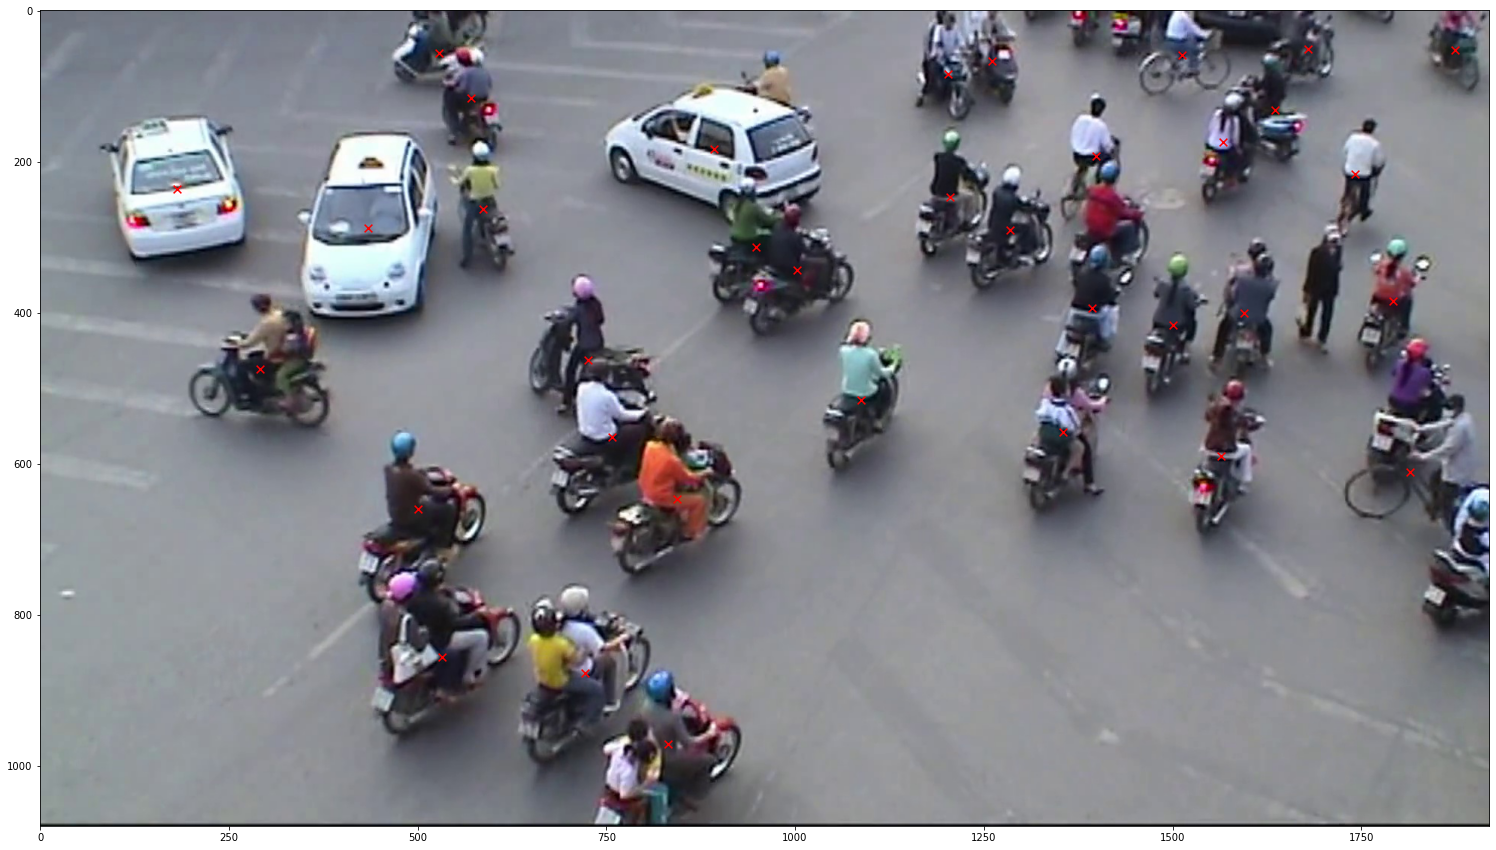

In [128]:
data = image.imread(sample_image_xml_path)

plt.figure(figsize=(30, 15))
for box in bounding_box_list:
    centeroid = calc_centeroid_point(box)
    plt.scatter(x=centeroid[0], y=centeroid[1], marker='x', color="red", s=60)
plt.imshow(data)
plt.show()

In [129]:
f = open("./examples/image8004dot.txt", "w")
for box in bounding_box_list:
    centeroid = calc_centeroid_point(box)
    print('\t'.join([str(centeroid[0]), str(centeroid[1])]))
    f.write('\t'.join([str(centeroid[0]), str(centeroid[1])]) + '\n')
f.close()

181	236
434	288
892	183
291	474
500	660
533	856
722	877
832	971
726	463
587	262
757	565
843	647
948	313
1003	344
1087	516
1205	247
1285	290
1398	192
1742	216
1815	611
1512	58
1355	558
1564	590
1501	416
1393	394
1594	400
1792	384
1567	174
1635	131
1679	51
1874	52
1203	84
1261	67
571	115
528	56
